## EfficientNetV2 Medium - middle exposure

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
  aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))


Accuracy score pr fold
0.7126213592233009, 0.7009708737864078, 0.7009708737864078, 0.7087378640776699, 0.7165048543689321, 
0.7184466019417476, 0.7203883495145631, 0.7126213592233009, 0.6932038834951456, 0.7184466019417476, 
MSE pr fold
0.2866052045589666, 0.30170060746193544, 0.3069932960021691, 0.33172066217557633, 0.2881629055369206, 
0.2761310490940223, 0.27697514911441334, 0.29387251871660003, 0.30373438561450966, 0.27810198058120794, 
aggregate accuracy, mse
0.7223300970873786 0.2753004481257845


In [ ]:
#score with 450 epochs, 160 steps
'''Accuracy score pr fold
0.6873786407766991, 0.6757281553398058, 0.683495145631068, 0.7106796116504854, 0.7009708737864078, 
0.7048543689320388, 0.6990291262135923, 0.683495145631068, 0.6990291262135923, 0.6601941747572816, 
MSE pr fold
0.3213496256030906, 0.3765477349974717, 0.3317787046957071, 0.2848554733474878, 0.28457994675059795, 
0.3254396787970704, 0.3107698348896557, 0.3481675475700843, 0.29518738573095393, 0.37277993194640846, 
aggregate accuracy, mse
0.7242718446601941 0.29181617978158675
'''

### Boxplot of prediction pr age class

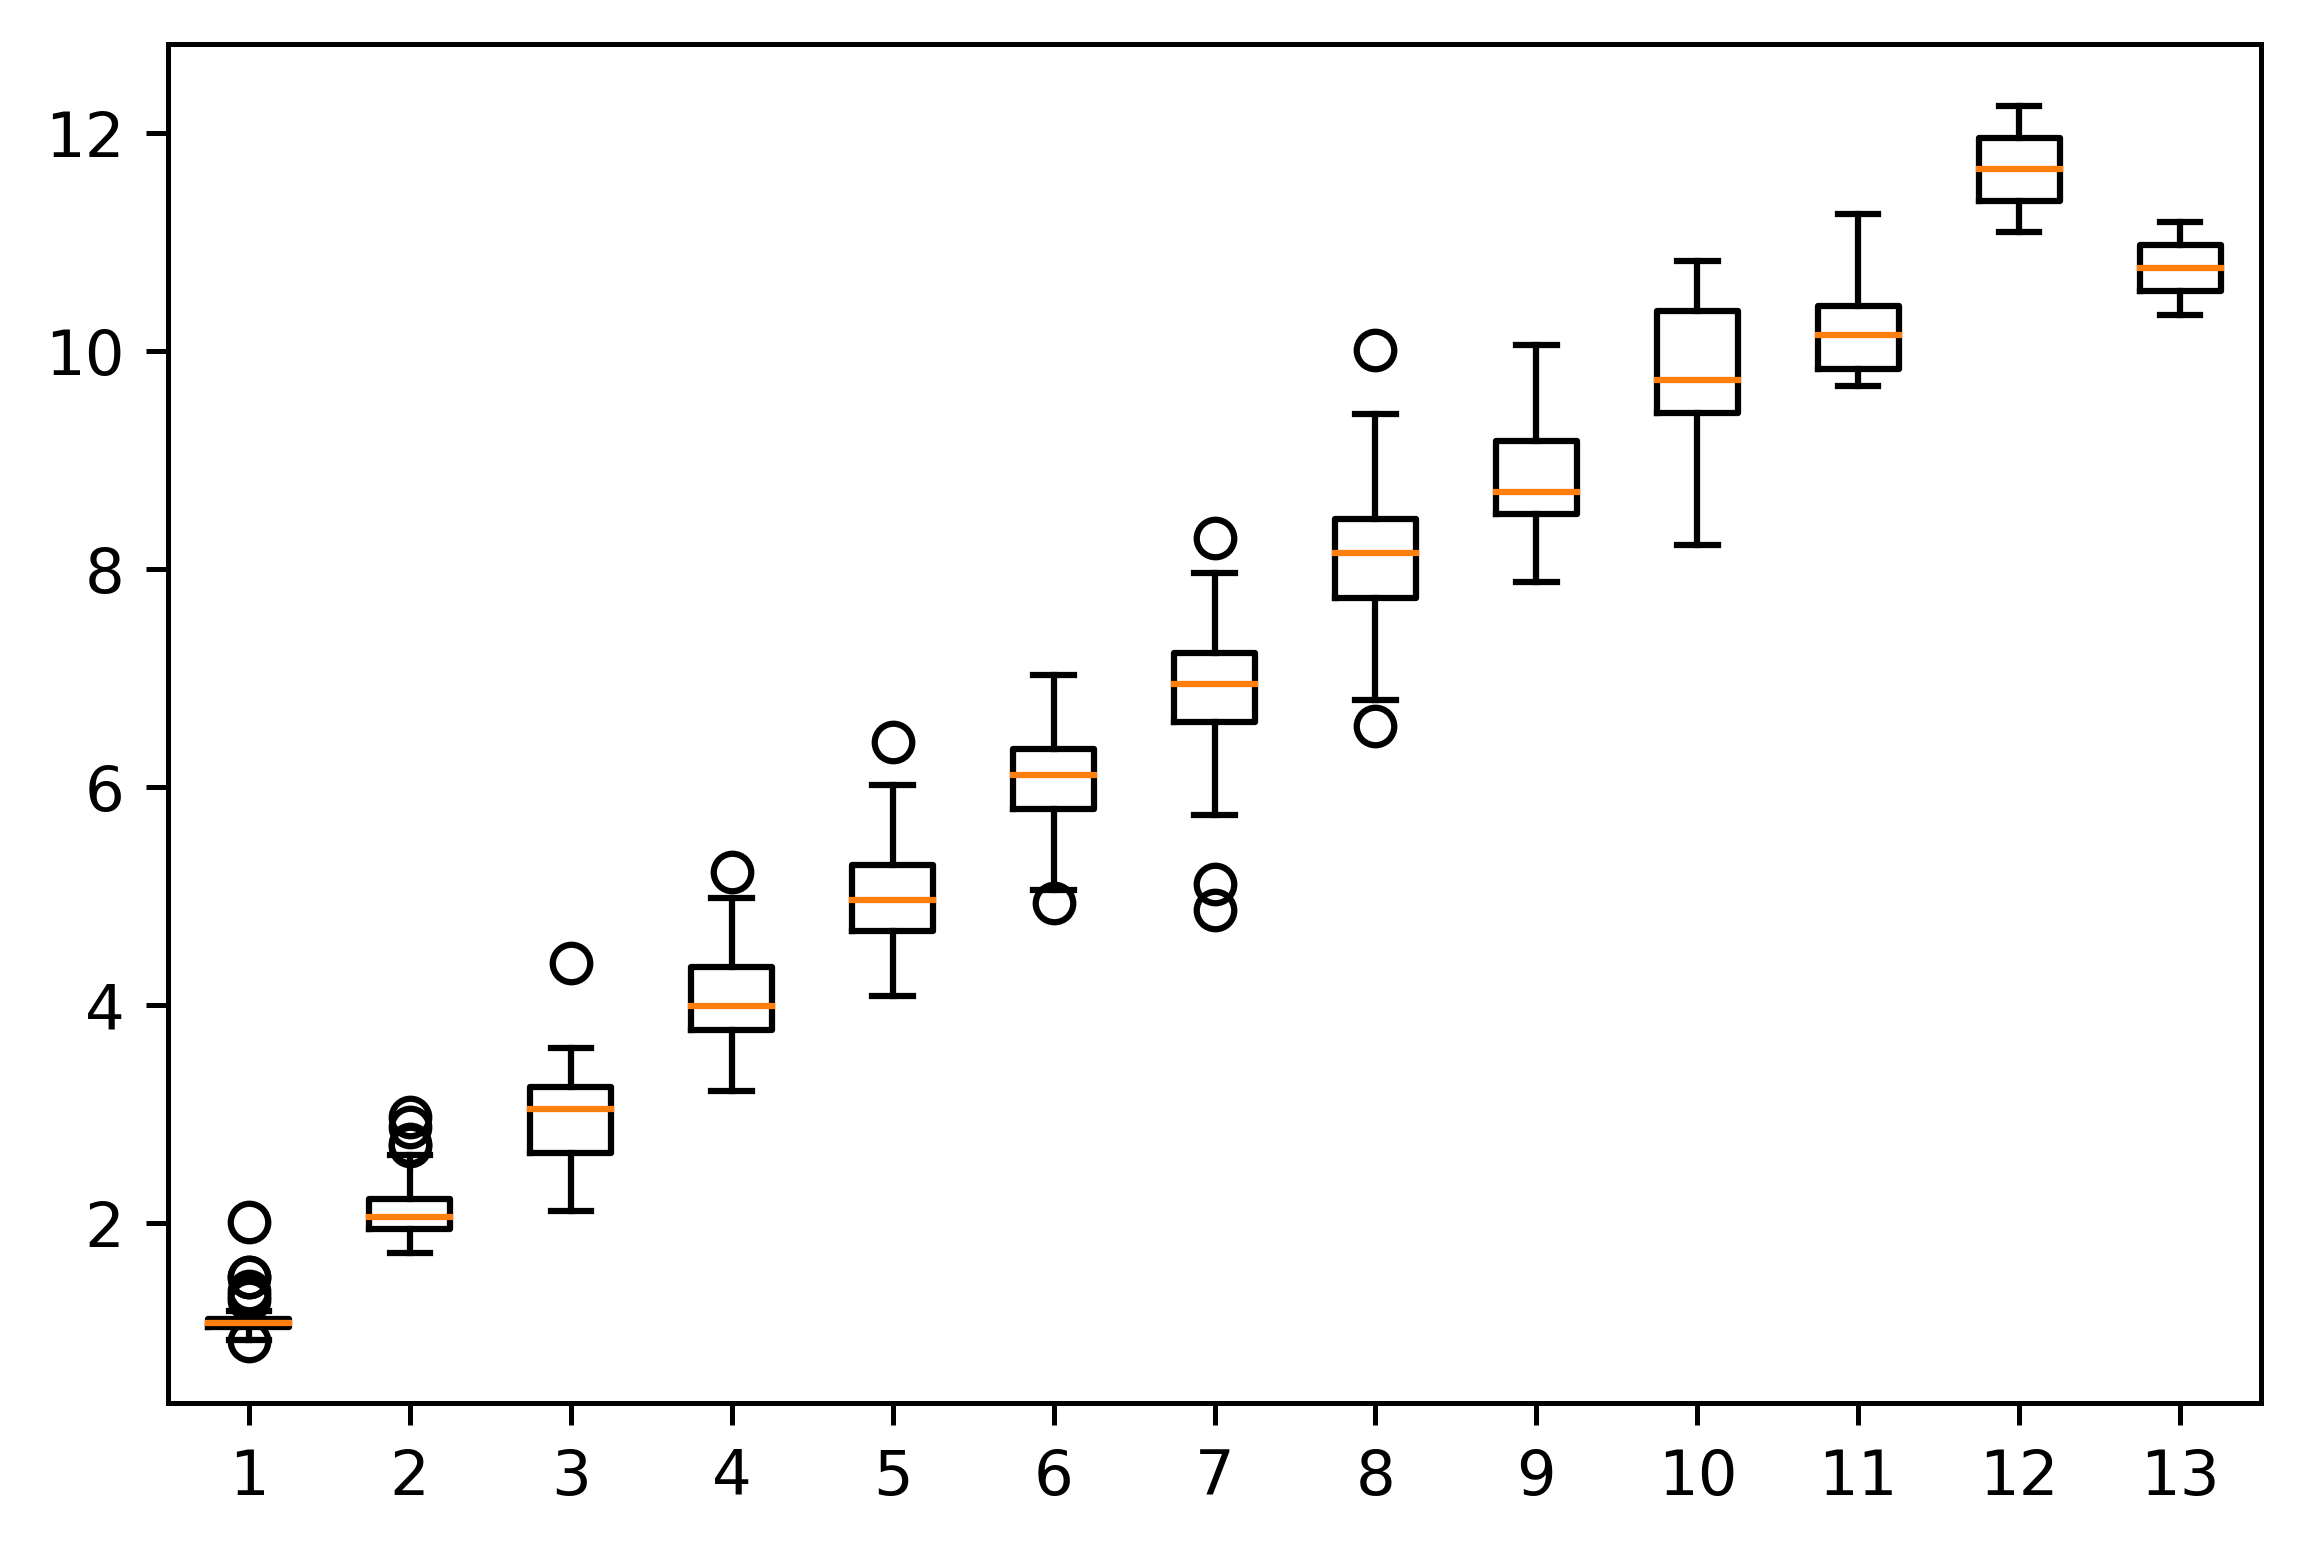

In [4]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()


### Residual plot per age group

The predictions show heteroskedasticity:
heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

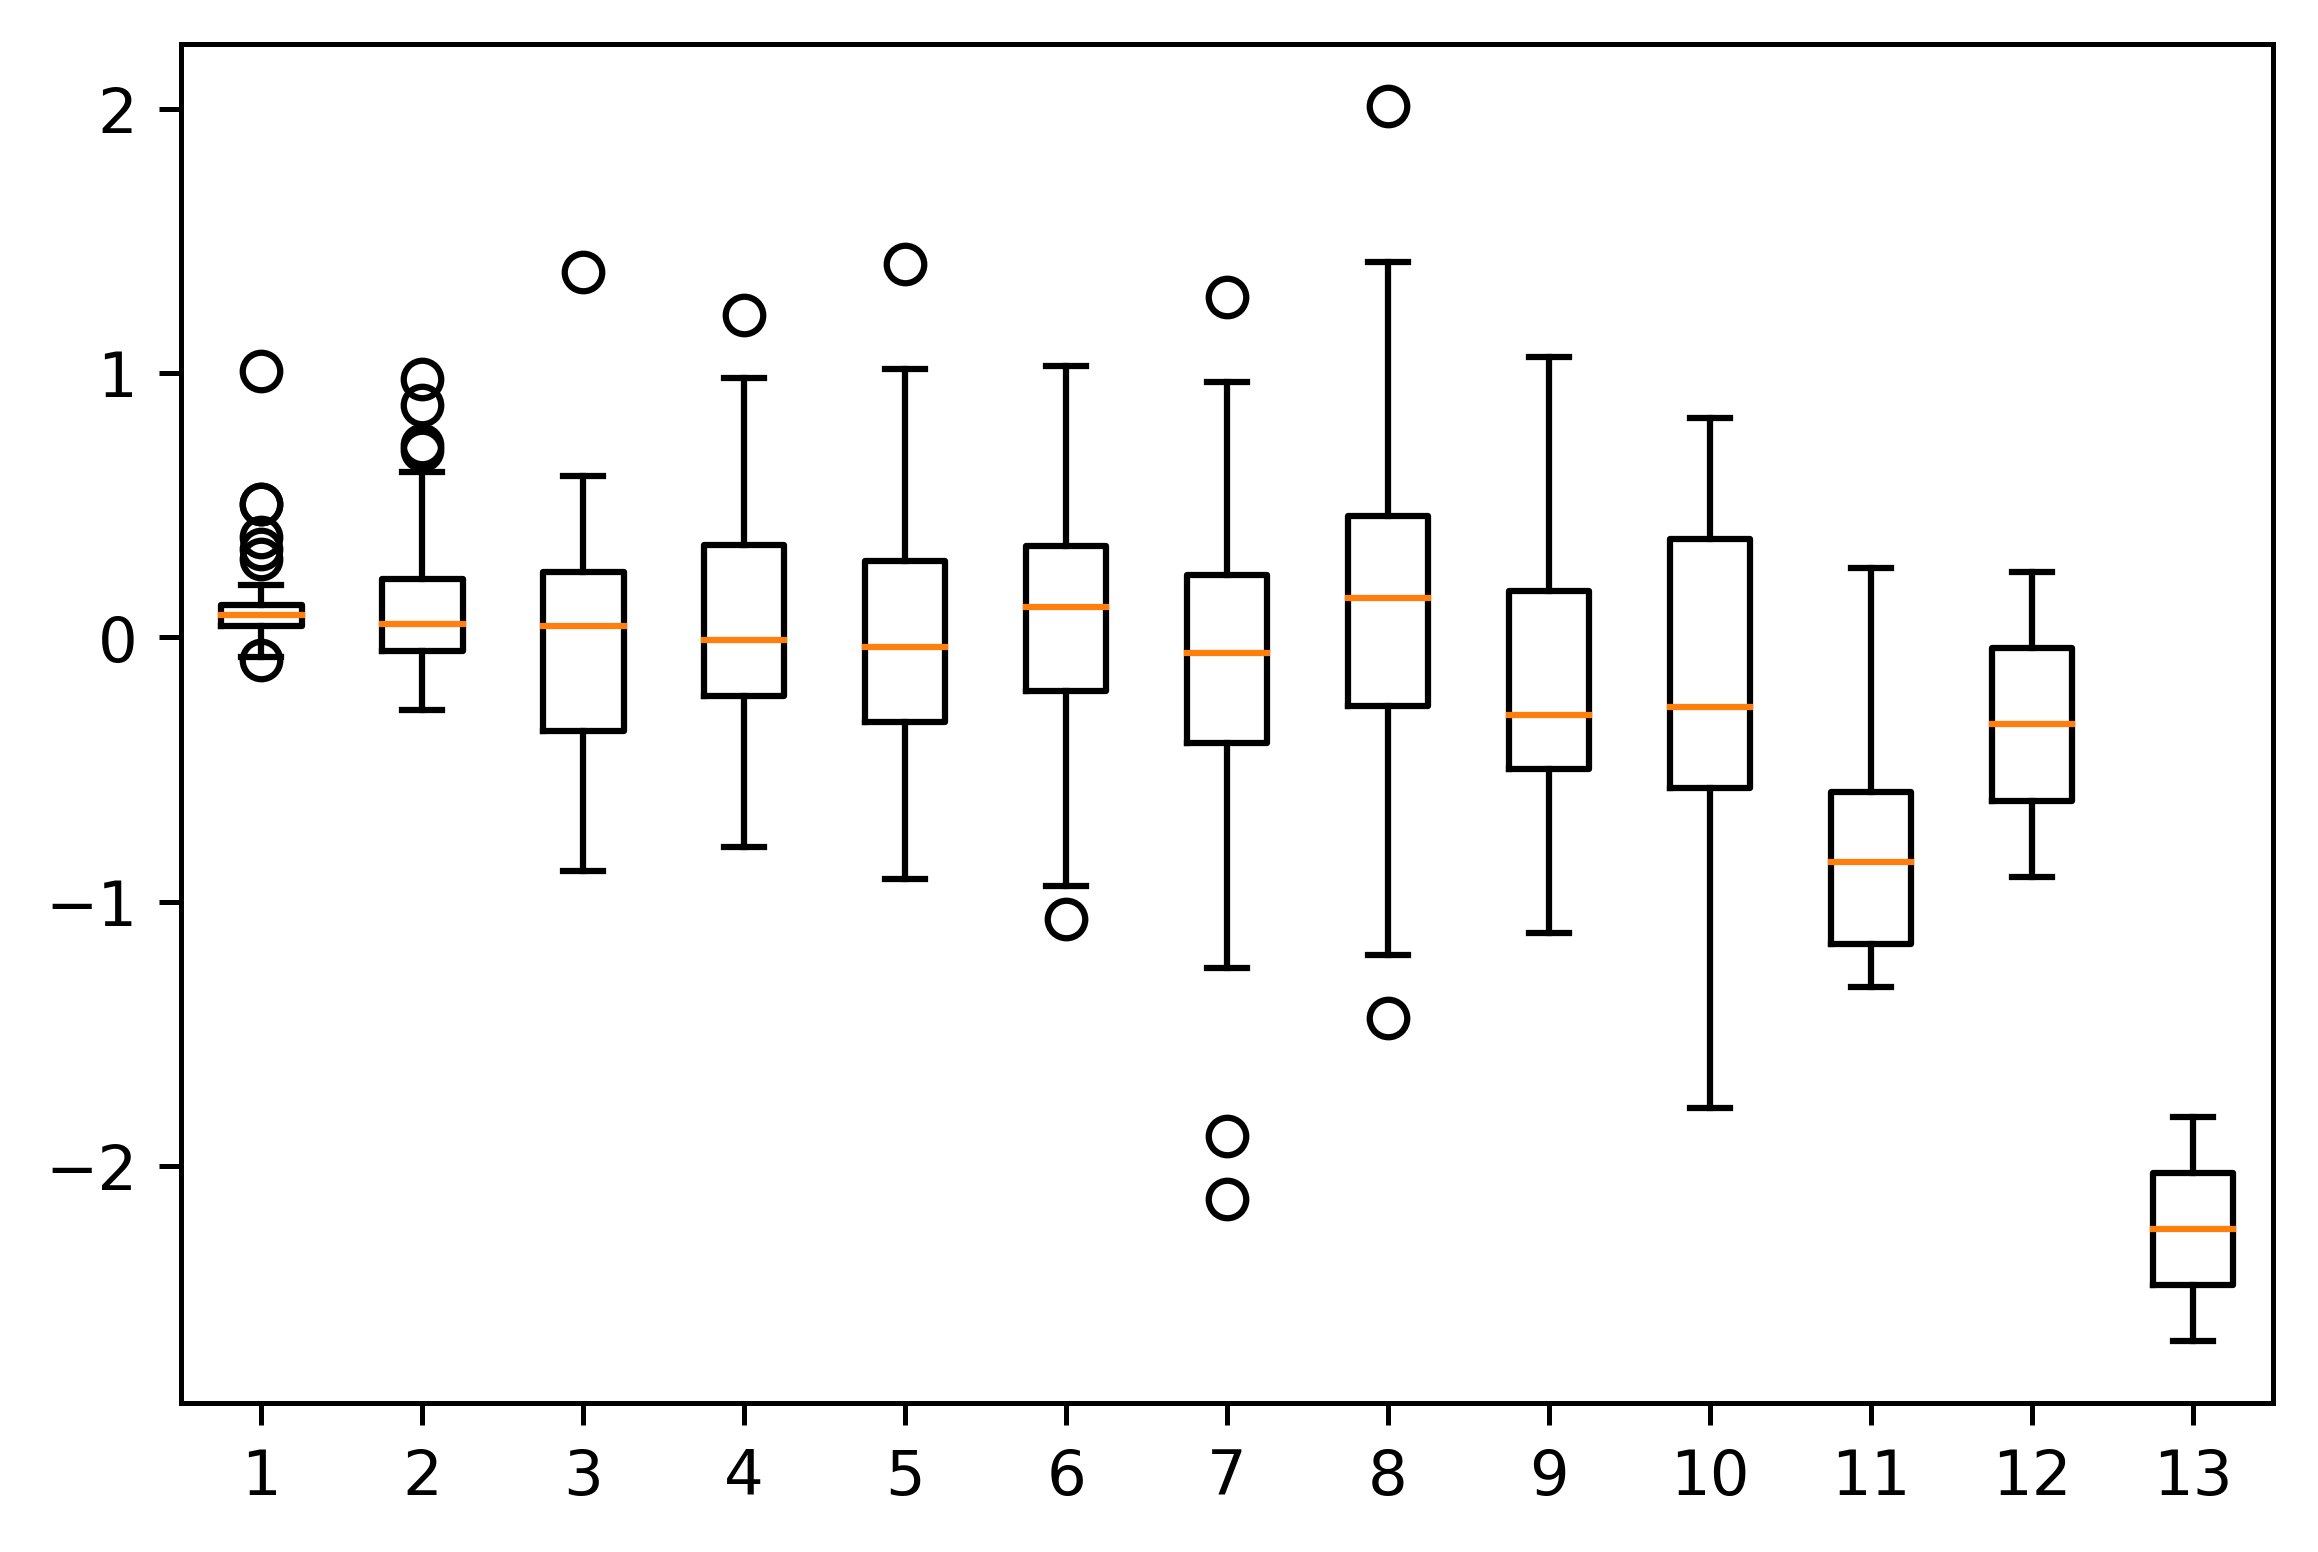

In [5]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

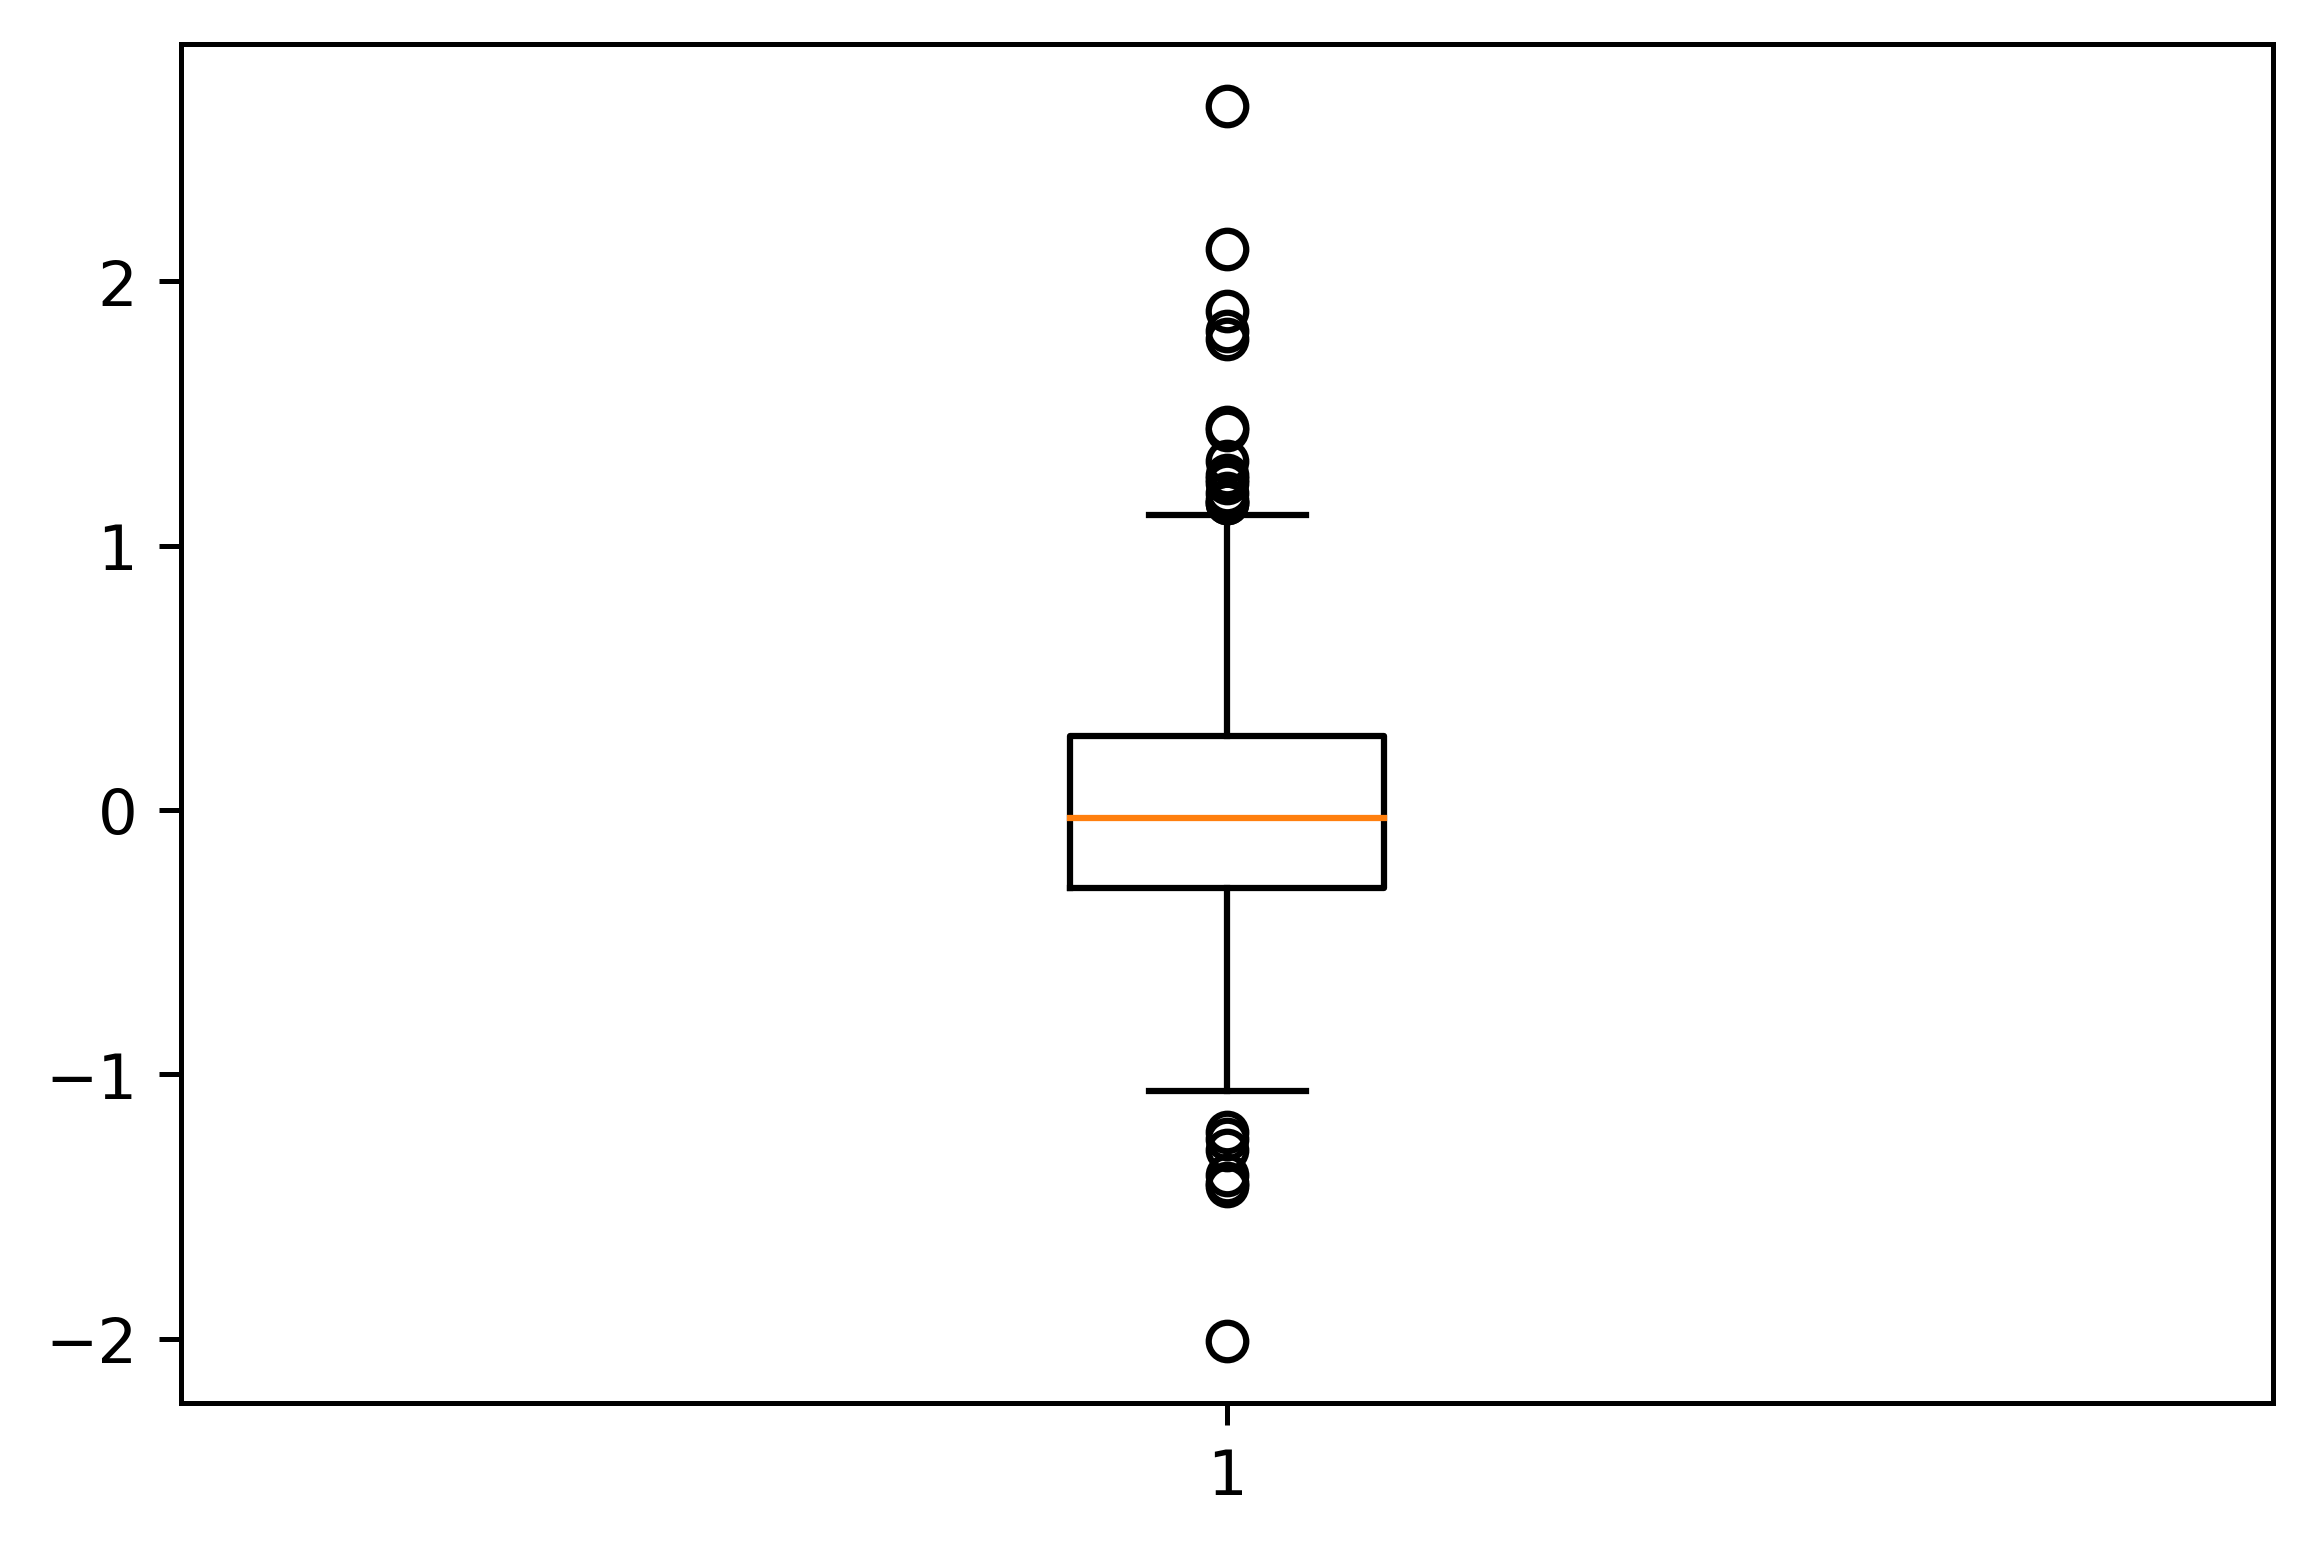

,0
count,515.000000
mean,0.011750
std,0.525069
min,-2.010585
25%,-0.294804
50%,-0.031916
75%,0.279515
max,2.663718


In [8]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

errors in [0.5, 1.5):  137
errors in [1.5, \inf): 6
Total missclassification errors:143


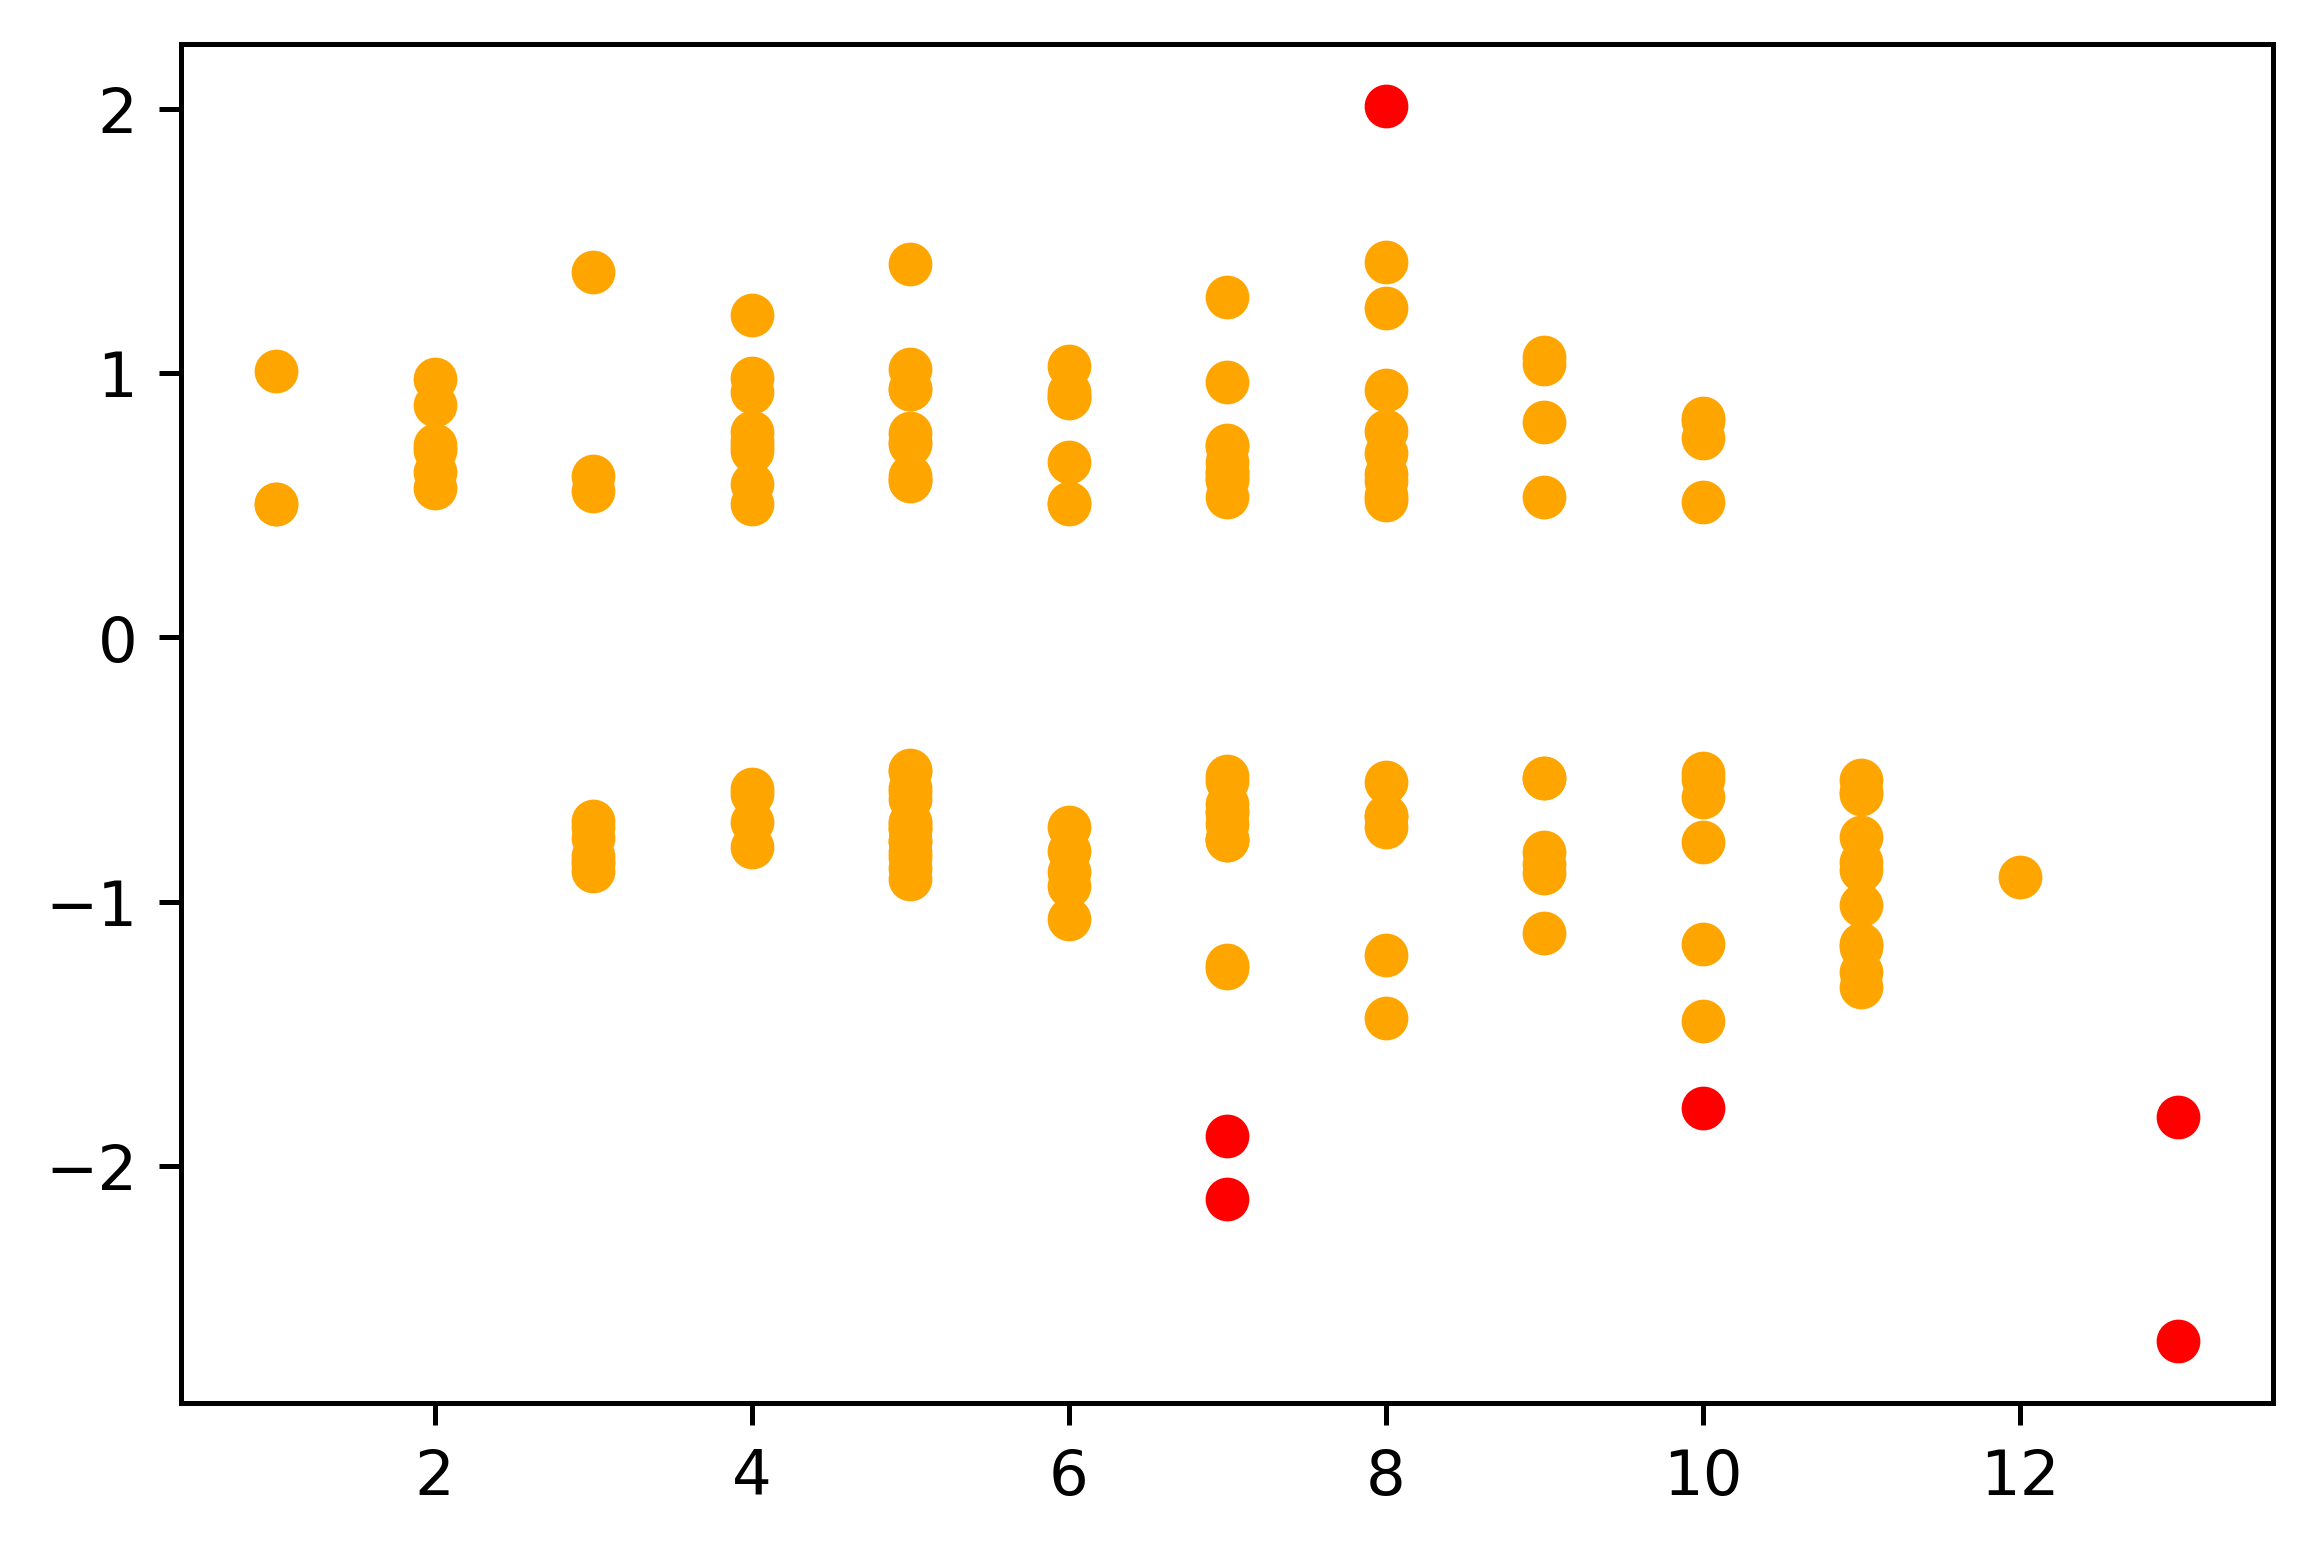

In [9]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()

### Excluding min/max prediction by fold pr prediction

In [10]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))
#0.7242718446601941 0.29181617978158675

aggregate accuracy, mse
0.7320388349514563 0.2787168217083865


### Outliers >= 1.5 years

In [11]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

4.876769256591797 7,71
5.113287115097046 7,362
10.010585117340089 8,279
8.218559074401856 10,369
11.186030960083007 13,92
10.336281776428223 13,342
